In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import display, Math

%matplotlib inline


Logistic Regression With Numpy 

# Load in data

In [5]:
Option_chain =  pd.read_csv('Option_chain.csv', index_col=[0, 1]).T
display(Option_chain)

Metric     Closing_price                                                  \
Stock_name           AAL        AAPL        ABBV        ABNB        AFRM   
2021-11-15     20.320000  150.000000  116.839996  207.210007  147.990005   
2021-11-16     19.840000  151.000000  116.419998  207.039993  151.289993   
2021-11-17     19.860001  153.490005  117.349998  199.110001  151.720001   
2021-11-18     19.389999  157.869995  117.070000  204.330002  139.130005   
2021-11-19     19.280001  160.550003  116.239998  196.419998  136.160004   
...                  ...         ...         ...         ...         ...   
2022-04-19     19.590000  167.399994  156.350006  170.119995   37.029999   
2022-04-20     19.480000  167.229996  156.699997  164.550003   34.759998   
2022-04-21     20.219999  166.419998  158.520004  157.910004   32.900002   
2022-04-22     20.180000  161.789993  154.990005  156.089996   31.160000   
2022-04-25           NaN         NaN         NaN         NaN         NaN   

Metric                                                             ...  \
Stock_name        AMC         AMD         AMZN   ARDX        ASAN  ...   
2021-11-15  42.680000  146.490005  3545.679932  1.120  136.399994  ...   
2021-11-16  42.599998  152.449997  3540.699951  1.050  135.289993  ...   
2021-11-17  42.130001  151.339996  3549.000000  1.020  131.600006  ...   
2021-11-18  40.410000  155.020004  3696.060059  0.988  136.979996  ...   
2021-11-19  40.869999  155.410004  3676.570068  1.000  137.190002  ...   
...               ...         ...          ...    ...         ...  ...   
2022-04-19  18.680000   96.930000  3162.310059  0.790   32.860001  ...   
2022-04-20  17.340000   94.019997  3079.959961  0.771   30.540001  ...   
2022-04-21  16.850000   89.849998  2965.919922  0.746   29.480000  ...   
2022-04-22  16.520000   88.139999  2887.000000  0.748   29.090000  ...   
2022-04-25        NaN         NaN          NaN    NaN         NaN  ...   

Metric     Put_volume                                                         \
Stock_name       VUZI       VXX      WBA    WEAT      WFC       WMT      XLE   
2021-11-15     3536.0       NaN      NaN     NaN      NaN   68790.0      NaN   
2021-11-16     2438.0       NaN      NaN     NaN      NaN  101433.0      NaN   
2021-11-17     6603.0       NaN      NaN     NaN      NaN   30508.0      NaN   
2021-11-18     6787.0       NaN      NaN     NaN      NaN   31082.0      NaN   
2021-11-19     5943.0       NaN      NaN     NaN      NaN   26730.0      NaN   
...               ...       ...      ...     ...      ...       ...      ...   
2022-04-19      930.0   50252.0      NaN  1762.0   9021.0   18774.0  15218.0   
2022-04-20     3013.0   40337.0   6941.0    80.0  29160.0   23897.0  33089.0   
2022-04-21     2954.0   44656.0   5345.0   654.0  30594.0   18748.0  15218.0   
2022-04-22      930.0  126361.0  18810.0    80.0  29525.0   27278.0  15218.0   
2022-04-25     2828.0   37857.0   1892.0    80.0  24748.0   23542.0  55463.0   

Metric                                  
Stock_name       XLF      XLV      XOM  
2021-11-15       NaN      NaN      NaN  
2021-11-16       NaN      NaN      NaN  
2021-11-17       NaN      NaN      NaN  
2021-11-18       NaN      NaN      NaN  
2021-11-19       NaN      NaN      NaN  
...              ...      ...      ...  
2022-04-19   68153.0   9919.0   6964.0  
2022-04-20   92191.0  24695.0  30176.0  
2022-04-21   51337.0   9919.0   7902.0  
2022-04-22   80662.0   9919.0  11058.0  
2022-04-25  135042.0  10796.0  11602.0  

[111 rows x 708 columns]

Define a new variable `GR` as a binary variable to indicate whether or not the stock has a daily change or not. 

In [42]:
symbol = 'SPY'
df = Option_chain.copy()
df = df.xs(key = symbol, axis = 1, level = 'Stock_name')
df['GR'] = 1*(df['Closing_price'].pct_change()> 0)
df = df.iloc[:-1]
df

Metric,Closing_price,Share_volume,Call_openInterest,Call_volume,Put_openInterest,Put_volume,GR
2021-11-15,467.429993,46980500.0,7026217.0,2034693.0,13766820.0,2378405.0,0
2021-11-16,469.279999,48857500.0,7049096.0,1674900.0,13812381.0,2029899.0,1
2021-11-17,468.140015,47858300.0,6982916.0,1384479.0,13816352.0,1727194.0,0
2021-11-18,469.730011,50625600.0,7209721.0,1493625.0,14228129.0,1517216.0,1
2021-11-19,468.890015,57315600.0,7539485.0,2019583.0,14728841.0,2759557.0,0
...,...,...,...,...,...,...,...
2022-04-18,437.970001,66002500.0,4793346.0,2380900.0,9512809.0,2982951.0,1
2022-04-19,445.040009,77821000.0,4884693.0,1229175.0,9375489.0,2177210.0,1
2022-04-20,444.709991,65224400.0,5075228.0,1899513.0,10044436.0,2623684.0,0
2022-04-21,438.059998,85417300.0,5014298.0,2198247.0,9887380.0,2893747.0,0


Given that at the beginning of 2022 the SP500 has declined over 15%, we should expect to see the latter part of the data have more 0's than 1's 

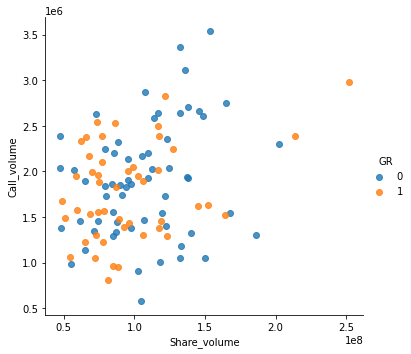

In [43]:
import seaborn as sns
snsdf = df.reset_index()
sns.lmplot(x ='Share_volume' , y = 'Call_volume', data=snsdf, hue = 'GR', fit_reg=False)

In [44]:
points = df[['Share_volume', 'Call_volume']].to_numpy()
labels = df['GR'].to_numpy()
print ("First and last 5 points:\n", '='*23, '\n', points[:5], '\n...\n', points[-5:], '\n')
print ("First and last 5 labels:\n", '='*23, '\n', labels[:5], '\n...\n', labels[-5:], '\n')

First and last 5 points:
 [[46980500.  2034693.]
 [48857500.  1674900.]
 [47858300.  1384479.]
 [50625600.  1493625.]
 [57315600.  2019583.]] 
...
 [[6.600250e+07 2.380900e+06]
 [7.782100e+07 1.229175e+06]
 [6.522440e+07 1.899513e+06]
 [8.541730e+07 2.198247e+06]
 [1.323544e+08 2.645529e+06]] 

First and last 5 labels:
 [0 1 0 1 0] 
...
 [1 1 0 0 0] 



In [45]:
def lin_discr (X, theta):
    ### BEGIN SOLUTION
    return X.dot(theta)
    ### END SOLUTION

def heaviside(Y):
    ### BEGIN SOLUTION
    return 1.0*(Y > 0.0)

def heaviside_int(Y):
    """Evaluates the heaviside function, but returns integer values."""
    return heaviside(Y).astype(dtype=int)

def gen_lin_discr_labels(points, theta, fun=heaviside_int):
    """
    Given a set of points and the coefficients of a linear
    discriminant, this function returns a set of labels for
    the points with respect to this discriminant.
    """
    score = lin_discr(points, theta)
    labels = fun(score)
    return labels

def plot_lin_discr(theta, df, x="x_0", y="x_1", hue="label",
                   palette={0: "red", 1: "olive"}, size=5,
                   linewidth=2):
    lm = sns.lmplot(x=x, y=y, hue=hue, data=df, palette=palette,
                    size=size, fit_reg=False)
    
    x_min, x_max = df[x].min(), df[x].max()
    y_min, y_max = df[y].min(), df[y].max()
    
    x1_min = (-theta[2][0] - theta[0][0]*x_min) / theta[1][0]
    x1_max = (-theta[2][0] - theta[0][0]*x_max) / theta[1][0]
    plt.plot([x_min, x_max], [x1_min, x1_max], linewidth=linewidth)
    
    def expand_interval(x_limits, percent=10.0):
        x_min, x_max = x_limits[0], x_limits[1]
        if x_min < 0:
            x_min *= 1.0 + 1e-2*percent
        else:
            x_min *= 1.0 - 1e-2*percent
        if x_max > 0:
            x_max *= 1.0 + 1e-2*percent
        else:
            x_max *= 1.0 + 1e-2*percent
        return (x_min, x_max)
    x_view = expand_interval((x_min, x_max))
    y_view = expand_interval((y_min, y_max))
    lm.axes[0,0].set_xlim(x_view[0], x_view[1])
    lm.axes[0,0].set_ylim(y_view[0], y_view[1])
    
def mark_matches(a, b, exact=False):
    """
    Given two Numpy arrays of {0, 1} labels, returns a new boolean
    array indicating at which locations the input arrays have the
    same label (i.e., the corresponding entry is True).
    
    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as the same up to a swapping of the labels. This feature
    allows
    
      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]
      
    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1)).all()
    assert ((b_int == 0) | (b_int == 1)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod(a.shape):
        return exact_matches
    return exact_matches == False # Invert
    
def count_matches(a, b, exact=False):
    """
    Given two sets of {0, 1} labels, returns the number of mismatches.
    
    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as similar up to a swapping of the labels. This feature
    allows
    
      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]
      
    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    matches = mark_matches(a, b, exact=exact)
    return int(matches.sum())

In [50]:
def logistic(Y):
    ### BEGIN SOLUTION
    return 1.0 / (1.0 + np.exp (-Y))
    ### END SOLUTION


def log_likelihood(theta, y, X):
### BEGIN SOLUTION
    u = np.ones((len (X), 1)) # column of all ones
    z = X.dot(theta)
    return y.T.dot(z) + u.T.dot(np.log(logistic(-z)))

def grad_log_likelihood(theta, y, X):
    """Returns the gradient of the log-likelihood."""
    ### BEGIN SOLUTION
    return X.T.dot(y - logistic(X.dot(theta)))
    ### END SOLUTION

def np_col_vec (list_values):
    """Returns a Numpy column vector for the given list of scalar values."""
    return np.array ([list_values]).T

# Redefine `my_theta` as instructed above to reduce the number of mismatches:
my_theta = np_col_vec([-1., 3., 0.]) # 123 mismatches
### BEGIN SOLUTION
my_theta = np_col_vec([-6.5, -1.35]) # 5 mismatches
my_theta = np_col_vec([-2.,  -0.55]) # 5 mismatches

In [51]:
ALPHA = 0.1
MAX_STEP = 250


# Get the data coordinate matrix, X, and labels vector, y
X = points
y = labels.astype(dtype=float)

# Store *all* guesses, for subsequent analysis
thetas = np.zeros((3, MAX_STEP+1))

for t in range(MAX_STEP):
    # Fill in the code to compute thetas[:, t+1:t+2]
    ### BEGIN SOLUTION
    theta_t = thetas[:, t:t+1]
    delta_t = grad_log_likelihood(theta_t, y, X)
    delta_t = delta_t / np.linalg.norm(delta_t, ord=2)
    thetas[:, t+1:t+2] = theta_t + ALPHA*delta_t
    ### END SOLUTION
    
theta_ga = thetas[:, MAX_STEP:]
print("Your (hand) solution:", my_theta.T.flatten())
print("Computed solution:", theta_ga.T.flatten())

print("\n=== Comparisons ===")
display(Math (r'\dfrac{\theta_0}{\theta_2}:'))
print("Your manual (hand-picked) solution is", my_theta[0]/my_theta[2], \
      ", vs. MLE (via gradient ascent), which is", theta_ga[0]/theta_ga[2])
display(Math (r'\dfrac{\theta_1}{\theta_2}:'))
print("Your manual (hand-picked) solution is", my_theta[1]/my_theta[2], \
      ", vs. MLE (via gradient ascent), which is", theta_ga[1]/theta_ga[2])

print("\n=== The MLE solution, visualized ===")
ga_labels = gen_lin_discr_labels(points, theta_ga)
df_ga = df.copy()
df_ga['label'] = mark_matches(ga_labels, labels).astype (dtype=int)
plot_lin_discr(theta_ga, df_ga)

ValueError: shapes (110,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)